# DS 3000 HW 8

Due: Friday Aug 2nd @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

In [8]:
# below are all the modules you will need on this homework
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pylab as py
import scipy.stats as stats

## Part 1: Simple Linear Regression (50 points)

For this problem you will use the `df_owl_2018.csv` file in your Homework Module on Canvas. This data set contains statistics from the 2018 Overwatch League (cleaned from [this website](https://overwatchleague.com/en-us/statslab?statslab=heroes)). Overwatch is a video game where two teams of 6 players compete against each other. On each team, a player may assume one of three roles:
- Damage: whose job is to attack the other team
- Support: whose job is to heal their own team
- Tank: whose job is to absorb the damage of the other team

One of the characters you can play in Overwatch, Mercy, is a support character. Mercy's primary purpose is to heal others. Sometimes when she is healing another character, that character manages to defeat an opponent. This counts as a `Defensive Assists` statistic. In this part, we will see if we can predict how many `Defensive Assists` a player achieves as Mercy given the amount of `Healing Done`, in thousands.

In [9]:
df_owl = pd.read_csv('df_owl_2018.csv')
df_owl.head()

,start_time,match_id,stage,map_type,map_name,player,team,hero,role,Ability Damage Done,...,Ultimates Used,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
0,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Agilities,Los Angeles Valiant,Genji,Damage,0.0,...,8,0.0,0,0,0,0.273585,0,0.0,0,0.0
1,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Genji,Damage,0.0,...,1,0.0,0,0,0,0.166667,0,0.0,0,0.0
2,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Junkrat,Damage,0.0,...,3,0.0,0,0,0,0.137500,0,0.0,0,0.0
3,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Tracer,Damage,0.0,...,3,0.0,0,0,0,0.327001,0,0.0,0,0.0
4,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Envy,Los Angeles Valiant,D.Va,Tank,0.0,...,23,0.0,0,0,0,0.314785,0,0.0,0,0.0


### Part 1.1: Data Manipulation (10 points)

Before starting, we need to do two things:
1. subset the data set so that it only includes Mercy observations
    - **hint:** you should remove all `hero` values besides `Mercy`
2. divide the `Healing Done` column by `1000` so that the values are in thousands of points
    - this will assist in the interpretation of the slope

### Part 1.2: Get Predictions via Cross Validation (15 points)

Use `LinearRegression()` to fit the data and `reg.predict(x)` to get the `y_pred` predictions. Do this via 5-fold cross validation:

1. define your x (`Healing Done`) and y (`Defensive Assists`) arrays
1. set up a 5-fold `Kfold` object (no need to stratify, since there's nothing to stratify with)
2. initialize a `LinearRegression` object
2. initialize `y_pred`, a copy of `y`, to store predictions in
3. loop through the folds by `train_idx` and `test_idx`
    - fit the regression on `x_train` and `y_train`
    - predict using `x_test`
    
When you are done, calculate the $R^2$ of the cross validated predictions and interpret what it means and if it seems good or not. **Note:** there is no need to calculate/store the slopes and intercepts, since they will be slightly different for each fold of the cross validation.

### Part 1.3: Plotting and Interpreting the Full Line (10 points)

Now, fit the regression model to the full data set, then use the `show_fit()` function below to plot it and recover the final best fit line for the model. Interpret both the slope and intercept in the context of the problem, explaining what they mean as if to a non-technical expert. **Recall** you put `Healing Done` in thousands of points, which will affect the wording of your interpretation of the slope.

In [7]:
def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

### Part 1.4: Checking Assumptions and Making Recommendations (15 points)

Use plots to check to see if the data meet the assumptions for performing a linear regression:
1. independence
2. constant variance/linearity
3. normality

Then, **in a markdown cell**, write 3-4 sentences about whether the model meets the assumptions, what that tells you about the usefulness of the model, and recommendations for next steps.

## Part 2: Multiple/Exponential/Polynomial Regression (50 total points)

In this problem you will use the `FuelConsumptionCo2.csv` file (from your Homework Module on Canvas) to build three candidate models to predict a vehicle's Carbon Dioxide Emissions (`CO2EMISSIONS`).

In [12]:
df_fuel = pd.read_csv('FuelConsumptionCo2.csv')
df_fuel.dropna(inplace=True)
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Part 2.1: Multiple Regression (15 points)

Our first model will be a multiple regression model where we try to predict `CO2EMISSIONS` with `ENGINESIZE`, `CYLINDERS` and `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 2.1.1

Fit the model using the `LinearRegression()` function from `sklearn` and save the predictions as `y_pred`. Make sure you define the feature list:

    x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']
    
since you will need this in the next sub-part.

#### Part 2.1.2

Run the below code, then **in a markdown cell** do two things: (1) interpret what the slope for the `ENGINESIZE` coefficient means and (2) discuss what the difference (or lack thereof) between $R^2$ and $R^2_{adjusted}$ means.

In [17]:
import statsmodels.api as sm

# another way to fit the regression model
X, y = df_fuel[x_feat_list], df_fuel['CO2EMISSIONS']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#display line, regular R2 and adjusted R-squared
print(model.params)
print(model.rsquared)
print(model.rsquared_adj)

const                       309.122330
ENGINESIZE                   10.524009
CYLINDERS                     6.785908
FUELCONSUMPTION_COMB_MPG     -4.819437
dtype: float64
0.8839058514850425
0.8835782104262044


#### Part 2.1.3

Create 5 error plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the errors
- A plot of `ENGINESIZE` vs. the errors
- A plot of `CYLINDERS` vs. the errors
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the errors
- A normal probability quantile-quantile plot of the errors

You do not have to comment on them yet; but you will in Part 2.4 as part of discussing all models you build in Part 2.

### Part 2.2: Exponential Regression (15 points)

Our second model will be an exponential regression model where we try to predict `CO2EMISSIONS` with only `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 2.2.1

Fit the exponential regression model, making sure to properly store the predicted values as `y_pred`. After you have fit the model and gotten the predictions, in the same cell, run the following lines (you will need them for the next sub-part):

    x_line = np.array(range(10,60,1)).reshape(-1,1)
    y_hat = np.exp(reg.predict(x_line))

#### Part 2.2.2

Run the below code which will calculate $R^2$ for your exponential model and then plot the fitted line on the scatterplot of the features. **In a markdown cell** interpret what $R^2$ represents and discuss *briefly* if the model seems to be a good fit.

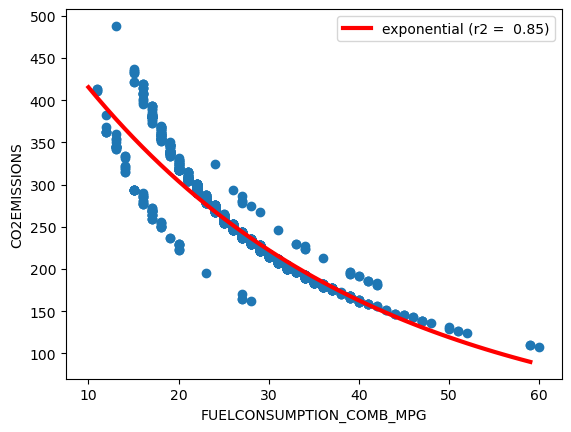

In [24]:
r2_exp = r2_score(y_true=y, y_pred=y_pred)

plt.scatter(x=df_fuel['FUELCONSUMPTION_COMB_MPG'], y=df_fuel['CO2EMISSIONS'])
plt.plot(x_line, y_hat, linewidth=3, color='r', label=f'exponential (r2 = {r2_exp: .2f})')
plt.legend()
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS');

#### Part 2.2.3

Create 3 error plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the errors
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the errors
- A normal probability quantile-quantile plot of the errors

You do not have to comment on them yet; but you will in Part 2.4 as part of discussing all models you build in Part 2.

### Part 2.3: Polynomial Regression (10 points)

For our third and final model, we will explore polynomial models where we try to predict `CO2EMISSIONS` with only `ENGINESIZE`.
The next three cells contain functions that I have copied from lecture, which you will find helpful for completing the following subparts.

In [28]:
def cross_val_r2(x, y, degree, n_splits=10):
    """ computes cross validated r2 (regression performance on unseen data)
    
    """
    # project x to polynomial
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
        
    # initialize empty y predictions
    y_pred = np.empty_like(y)
    
    # initialize linear regression model
    # fit_intercept=False since we're using poly features
    reg = LinearRegression(fit_intercept=False)
    
    kfold = KFold(n_splits=n_splits)
    for train_idx, test_idx in kfold.split(x_poly, y):
        # split data
        x_poly_test = x_poly[test_idx, :]
        x_poly_train = x_poly[train_idx, :]
        y_train = y[train_idx]
        
        # fit
        reg.fit(x_poly_train, y_train)
        
        # predict
        y_pred[test_idx] = reg.predict(x_poly_test)
        
    # compute cross validated r2
    r2 = r2_score(y_true=y, y_pred=y_pred)
    
    return r2

In [29]:
def fit_plot_poly(x, y, degree):
    """ fits and plots a polynomial of given degree
    
    Args:
        x (np.array): (n_samples, 1) array of x inputs
        y (np.array): (n_sample, 1) array of target values
        degree (int): max degree of polynomial
    """
    
    # project x to polynomial
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
    
    # fit via linear regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)
    
    # predict y values (line of polynomial)
    # (we use 101 evenly spaced points as there may be so few
    # observations that the polynomial appears piecewise linear
    # with straight lines between each observation)
    x_fine = np.linspace(x.min(), x.max(), 101).reshape(-1, 1)
    x_fine_poly = poly_project.fit_transform(x_fine)
    y_pred_fine = reg.predict(x_fine_poly)
    
    # compute r2
    y_pred = reg.predict(x_poly)
    r2 = r2_score(y_true=y, y_pred=y_pred)
    
    # get the predicted line
    coef_pred = reg.coef_
    str_poly_pred = coef_to_poly_str(coef_pred)
    
    # plot polynomial / observations
    plt.plot(x_fine, y_pred_fine, label=f'degree {degree} fit', color='k', linewidth=2)
    plt.title(f'pred: {str_poly_pred}\n$R^2=${r2:.2f}')
    plt.scatter(x, y, label='observed', color='r')
    plt.legend()  
    
    return reg

In [30]:
def coef_to_poly_str(coef, include_zero=False):
    """ creates a str of polynomial corresponding to coef    

    Args:
        coef (np.array): coefficients of polynomial
        
    Returns:
        poly_str (str): str of polynomial
    """
    
    str_monomial_list = []
    for deg, coef in enumerate(coef):
        if coef == 0 and include_zero == False:
            continue
        str_monomial_list.append(f'{coef:+.1f} x^{deg:d}')
        
    # handle case of all zero coef
    if len(str_monomial_list):
        poly_str = ' '.join(str_monomial_list)
    else:
        poly_str = '0'
        
    return f'y = {poly_str}'

#### Part 2.3.1

Use the `cross_val_r2` function to fit models from degree `0` to degree `10`, where you use `ENGINESIZE` to predict `CO2EMISSIONS`. Keep track of the cross validated $R^2$ for each degree; for the degree that has the best (largest) $R^2$ use the `fit_plot_poly` function to plot the best polynomial model. Note the final line and the $R^2$ as fit to the full data set.

#### Part 2.3.2

Fit the best polynomial model that was identified in the previous subpart, and then create 3 error plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the errors
- A plot of `ENGINESIZE` vs. the errors
- A normal probability quantile-quantile plot of the errors

You do not have to comment on them yet; but you will in Part 2.4 as part of discussing all models you build in Part 2.

### Part 2.4: Decision Time (10 points)

**In a markdown cell**, give a *lengthy and **detailed*** discussion of the three candidate models. Discuss each of their strengths/weaknesses/benefits (i.e. which model had the best $R^2$ and the worst? which models met the assumptions and which did not?). Then, **make a decision** about which model you would suggest is most appropriate to use for predicting a vehicle's Carbon Dioxide Emissions.